# 原文網址：https://kknews.cc/code/bm4q3ej.html

In [2]:
import numpy as np 
import pandas as pd 
import datetime as dt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse

df = pd.read_csv('data/nehu_12.csv') 
df.head()

,SNO,La,Lo,date,year,month,day,hour,time_range,weekday,ISHoliday,cityName,townname,temp,wet,windspeed,rain,in,out,stay
0,15684,25.055,121.576,2021/12/4,2021,12,4,6,2,7,1,臺北市,內湖區,17.6,66.500000,2.233333,0.000000,2,0,2
1,15684,25.055,121.576,2021/12/13,2021,12,13,17,5,2,0,臺北市,內湖區,18.6,89.083333,2.566667,11.000000,0,0,1
2,15684,25.055,121.576,2021/12/19,2021,12,19,23,6,1,1,臺北市,內湖區,17.4,67.076923,3.076923,0.000000,0,1,0
3,15684,25.055,121.576,2021/12/26,2021,12,26,4,1,1,1,臺北市,內湖區,14.7,87.230769,3.076923,17.153846,0,0,1
4,15684,25.055,121.576,2021/12/13,2021,12,13,21,6,2,0,臺北市,內湖區,18.6,89.083333,2.566667,11.000000,1,0,0


In [16]:
df['date'] = pd.to_datetime(df.date,format="%Y/%m/%d")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82349 entries, 0 to 82348
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   SNO         82349 non-null  int64         
 1   La          82349 non-null  float64       
 2   Lo          82349 non-null  float64       
 3   date        82349 non-null  datetime64[ns]
 4   year        82349 non-null  int64         
 5   month       82349 non-null  int64         
 6   day         82349 non-null  int64         
 7   hour        82349 non-null  int64         
 8   time_range  82349 non-null  int64         
 9   weekday     82349 non-null  int64         
 10  ISHoliday   82349 non-null  int64         
 11  cityName    82349 non-null  object        
 12  townname    82349 non-null  object        
 13  temp        82349 non-null  float64       
 14  wet         82349 non-null  float64       
 15  windspeed   82349 non-null  float64       
 16  rain        82349 non-

In [4]:
a = df.groupby(by=['date'])['in'].sum().reset_index()
a

,date,in
0,2021-12-01,810
1,2021-12-02,816
2,2021-12-03,1012
3,2021-12-04,662
4,2021-12-05,508
5,2021-12-06,628
6,2021-12-07,846
7,2021-12-08,786
8,2021-12-09,651
9,2021-12-10,717


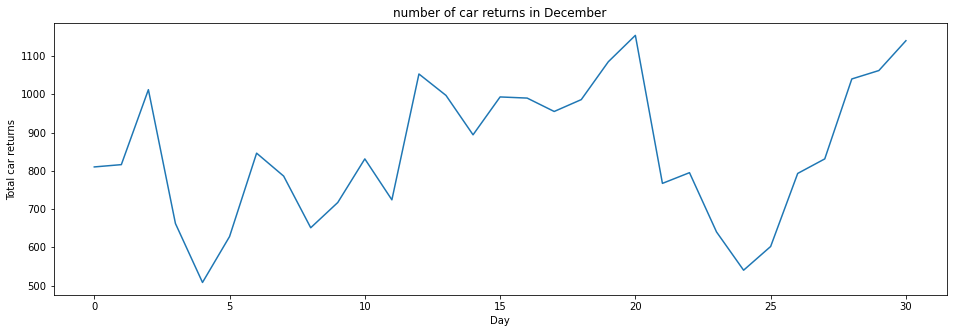

In [18]:
a.index.freq = 'MS' 
ax = a['in'].plot(figsize = (16,5), title = "number of car returns in December") 
ax.set(xlabel='Day', ylabel='Total car returns');


In [6]:
auto_arima(a['in'], m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   31
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -197.430
Date:                Tue, 15 Feb 2022   AIC                            400.860
Time:                        09:23:35   BIC                            405.162
Sample:                             0   HQIC                           402.262
                                 - 31                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    311.9236    135.633      2.300      0.021      46.088     577.759
ar.L1          0.6372      0.155      4.105      0.000       0.333       0.941
sigma2      1.957e+04   6430.344      3.044      0.002    6970.275    3.22e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 0.87
Prob(Q):                              0.69   Prob(JB):                         0.65
Heteroskedasticity (H):               1.02   Skew:                            -0.35
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
train_data = a[:len(a)-31] 
test_data = a[len(a)-31:] 
arima_model = SARIMAX(train_data['in'], order = (1,0,0)) 
arima_result = arima_model.fit() 
arima_result.summary()


C:\Users\ANITATSAI\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ANITATSAI\Anaconda3\lib\site-packages\statsmodels\tools\eval_measures.py:406: RuntimeWarning: divide by zero encountered in log
  return -2.0 * llf + np.log(nobs) * df_modelwc
C:\Users\ANITATSAI\Anaconda3\lib\site-packages\statsmodels\tools\eval_measures.py:431: RuntimeWarning: divide by zero encountered in log
  return -2.0 * llf + 2 * np.log(np.log(nobs)) * df_modelwc
C:\Users\ANITATSAI\Anaconda3\lib\site-packages\statsmodels\tools\eval_measures.py:431: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + 2 * np.log(np.log(nobs)) * df_modelwc
C:\Users\ANITATSAI\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3098: UserWarning: Early subset of data for variable 0  has too few non-missing observations to calculate t

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     in   No. Observations:                    0
Model:               SARIMAX(1, 0, 0)   Log Likelihood                   0.000
Date:                Mon, 14 Feb 2022   AIC                              4.000
Time:                        17:37:24   BIC                               -inf
Sample:                             0   HQIC                               nan
                                  - 0                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0        nan        nan        nan         nan         nan
sigma2            nan        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    nan. Standard errors may be unstable.
"""

In [9]:
train_data = a[:len(a)-12] 

In [12]:
arima_pred = arima_result.predict(start = len(train_data), end = len(a)-1, typ="levels").rename("ARIMA Predictions") 
arima_pred



NameError: name 'arima_result' is not defined

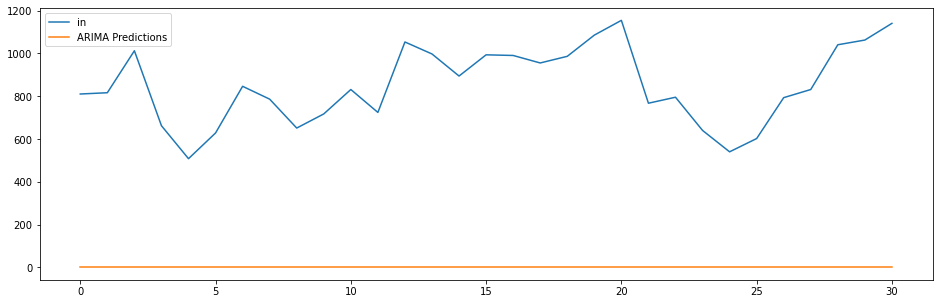

In [61]:
test_data['in'].plot(figsize = (16,5), legend=True) 
arima_pred.plot(legend = True);

